In [2]:
import pandas as pd
import dask.dataframe as dd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import scipy
import implicit
import dask.array as da
import dask.bag as db
from dask import bag
from scipy.sparse import coo_matrix
import dask_ml.model_selection as dcv
import dask_ml.linear_model as dlm
import dask_ml.metrics as dmm
import datetime as dt
from implicit.nearest_neighbours import CosineRecommender, BM25Recommender, TFIDFRecommender
from catboost import CatBoostRegressor
import warnings
warnings.simplefilter("ignore")

In [3]:
df = dd.read_csv('ab_data.csv')

In [4]:
df_old = dd.read_csv("D:/ab_data_old.csv")

In [5]:
df_new = dd.read_csv("D:/ab_data_new.csv")

In [31]:
df_old.head()

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm,main_category,sub_category
0,Site,2023-07-31 20:52:08+00:00,2023-07-31,61896930866132383950325646921470902931,ec.add_to_cart,[27700],[1],[208110033958035755085421821958688847946],[69681917554556700874802494955123021674],[166483134332503757977559528044814078658]
1,Site,2023-07-31 20:54:46+00:00,2023-07-31,61896930866132383950325646921470902931,ec.add_to_cart,[20100],[1],[215057922289172719466119755448138020438],[69681917554556700874802494955123021674],[166483134332503757977559528044814078658]
2,Site,2023-07-31 20:58:27+00:00,2023-07-31,61896930866132383950325646921470902931,ec.add_to_cart,[27700],[1],[208110033958035755085421821958688847946],[69681917554556700874802494955123021674],[166483134332503757977559528044814078658]
3,Site,2023-07-31 21:00:17+00:00,2023-07-31,61896930866132383950325646921470902931,ec.add_to_cart,[22000],[1],[215057922289172719466119755448138020438],[69681917554556700874802494955123021674],[166483134332503757977559528044814078658]
4,Site,2023-07-31 21:02:23+00:00,2023-07-31,61896930866132383950325646921470902931,ec.add_to_cart,[28400],[1],[138194970271747089817822454109319815158],[221726170214372670448724233801986642747],[164638421152565622592959300737982649172]


In [32]:
df_new.head()

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm,main_category,sub_category
0,Site,2023-08-14 10:55:58+00:00,2023-08-14,269271870851066908770782671055693846515,ec.add_to_cart,[32700],[1],[218122193707604746259910414212305173388],[211338268502701624471844696781276899778],[115861544179174026525168547837668536544]
1,Site,2023-08-14 10:57:23+00:00,2023-08-14,269271870851066908770782671055693846515,ec.add_to_cart,[17600],[1],[218318230696127763079649450675101890077],[211338268502701624471844696781276899778],[115861544179174026525168547837668536544]
2,Site,2023-08-14 10:59:13+00:00,2023-08-14,269271870851066908770782671055693846515,ec.add_to_cart,[28400],[1],[172037452807649026546399016314853469880],[202660019707418499900180222862503903431],[61525578972860749997959855520913666269]
3,Site,2023-08-14 11:00:39+00:00,2023-08-14,269271870851066908770782671055693846515,ec.add_to_cart,[29500],[1],[101523428564212665138983948832780288456],[202660019707418499900180222862503903431],[61525578972860749997959855520913666269]
4,Site,2023-08-14 09:41:31+00:00,2023-08-14,101318833848528403991268748444764185941,ec.add_to_cart,[14500],[1],[169960846567174936995828293374034145250],[114639836107299792298330635391789064648],[249457240814916587348980337639330934205]


In [4]:
df.head()

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm
0,Site,2023-07-31 18:02:48+00:00,2023-07-31,159101870876680941124763074283887310289,ec.add_to_cart,[51900],[1],[246650657489635275096153414128031445780]
1,Site,2023-07-31 17:53:30+00:00,2023-07-31,160549958353988091657042237792643666894,ec.add_to_cart,[106500],[1],[59654860421784568890292174584309999524]
2,Site,2023-07-31 18:15:48+00:00,2023-07-31,37194927198371594897997683235554060578,ec.add_to_cart,[69900],[1],[96339979436456465965023331467213648072]
3,Site,2023-07-31 18:09:15+00:00,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[161000],[1],[205301865397266068858446379722445530525]
4,Site,2023-07-31 18:11:24+00:00,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[80800],[1],[190676360719300239326336156920448276451]


In [4]:
df.shape

(Delayed('int-50d84ca7-2ac5-4cea-9a73-8707294d4e57'), 8)

In [6]:
df.drop_duplicates().shape

(Delayed('int-0fc80e4c-d339-4d55-bc39-2fab09ae3d07'), 8)

In [34]:
df.platform.value_counts()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: platform, dtype: int64
Dask Name: value-counts-agg, 4 graph layers

In [35]:
# Получение размера датафрейма (количество строк и столбцов)
num_rows, num_cols = df.shape[0].compute(), df.shape[1]
print("Количество строк:", num_rows)
print("Количество столбцов:", num_cols)

Количество строк: 49701624
Количество столбцов: 8


In [5]:
# Поиск всех уникальных значений в стобце platform
unique_event_types = df['platform'].unique().compute()
print(unique_event_types)

0       Site
1        iOS
2    Android
Name: platform, dtype: object


In [15]:
df.groupby('platform')['user_id'].nunique().compute()

platform
Android    161622
Site       256902
iOS         74806
Name: user_id, dtype: int64

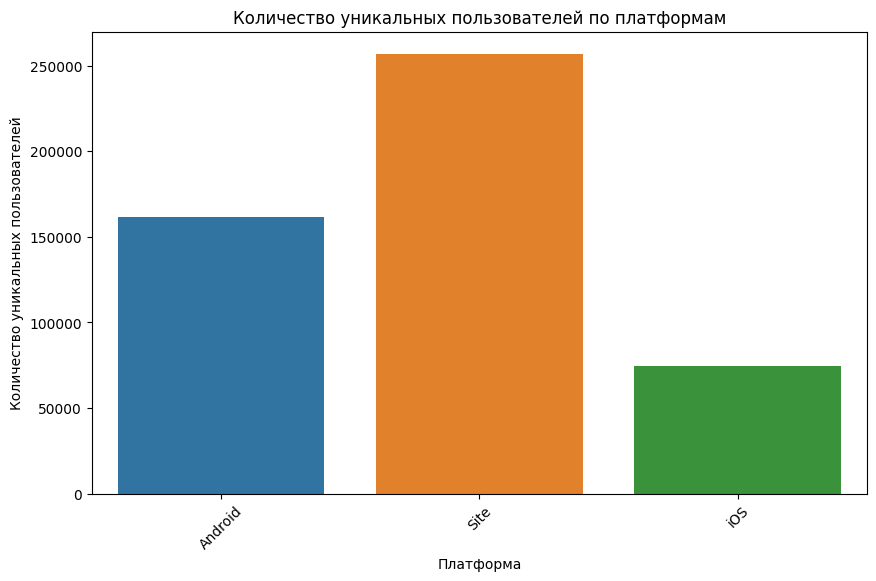

In [8]:
# Получение количества уникальных пользователей для каждой платформы
unique_users_by_platform = df.groupby('platform')['user_id'].nunique().compute()

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_users_by_platform.index, y=unique_users_by_platform.values)
plt.title("Количество уникальных пользователей по платформам")
plt.xlabel("Платформа")
plt.ylabel("Количество уникальных пользователей")
plt.xticks(rotation=45)
plt.show()

In [6]:
df['event_type'].unique().compute()

0     ec.add_to_cart
1       ec.view_item
2        ec.purchase
3    user_engagement
4           pageview
Name: event_type, dtype: object

In [14]:
df.groupby('event_type')['user_id'].count().compute()

event_type
ec.add_to_cart      3269327
ec.purchase          564472
ec.view_item       43938628
pageview             463599
user_engagement     1465598
Name: user_id, dtype: int64

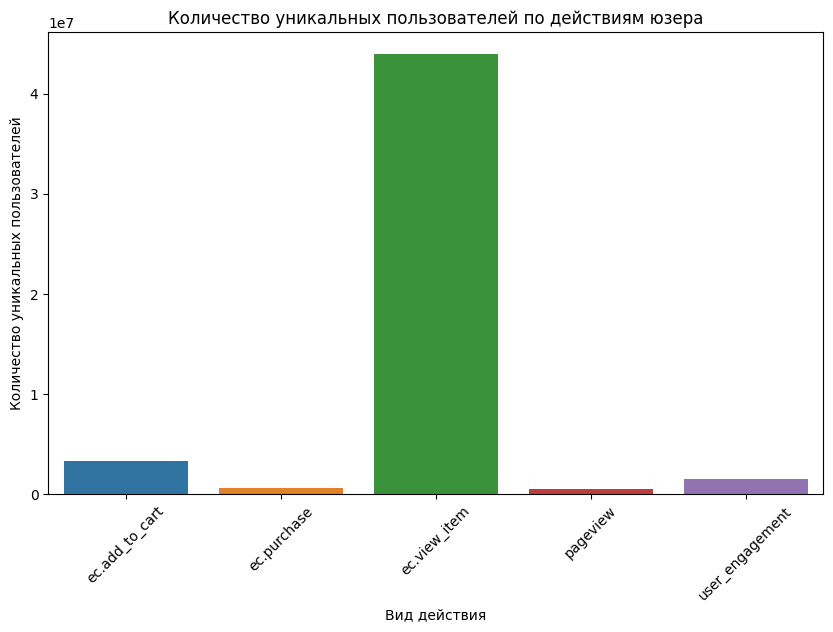

In [13]:
# Получение количества уникальных пользователей для каждой платформы
unique_users_by_platform = df.groupby('event_type')['user_id'].count().compute()

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_users_by_platform.index, y=unique_users_by_platform.values)
plt.title("Количество уникальных пользователей по действиям юзера")
plt.xlabel("Вид действия")
plt.ylabel("Количество уникальных пользователей")
plt.xticks(rotation=45)
plt.show()

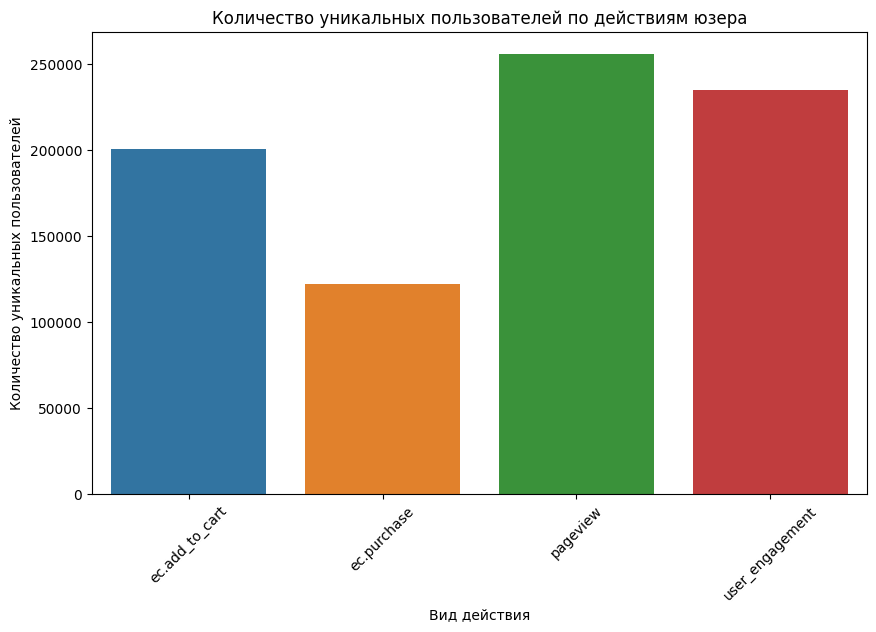

In [18]:
filtered_data = df[df['event_type'] != 'ec.view_item']

# Получение количества уникальных пользователей для каждого типа события
unique_users_by_event_type = filtered_data.groupby('event_type')['user_id'].nunique().compute()

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_users_by_event_type.index, y=unique_users_by_event_type.values)
plt.title("Количество уникальных пользователей по действиям юзера")
plt.xlabel("Вид действия")
plt.ylabel("Количество уникальных пользователей")
plt.xticks(rotation=45)
plt.show()

In [21]:
df['ecom.qty'].unique().compute()

0                                          [1]
1                                       [1, 1]
2                                    [1, 1, 1]
3      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4                                 [1, 1, 1, 1]
                        ...                   
165                                       [69]
166                                       [95]
167                                       [73]
168                                      [221]
169                                         []
Name: ecom.qty, Length: 170, dtype: object

In [23]:
df['ecom.nm'].nunique().compute()

6859925

In [6]:
event_type_counts = df['event_type'].value_counts().compute()
print("Уникальные типы событий и их количество:")
print(event_type_counts)


Уникальные типы событий и их количество:
ec.view_item       43938628
ec.add_to_cart      3269327
user_engagement     1465598
ec.purchase          564472
pageview             463599
Name: event_type, dtype: int64


In [ ]:
column_data_types = df.dtypes
print(column_data_types)

platform                  object
utc_event_time            object
utc_event_date    datetime64[ns]
user_id                   object
event_type                object
ecom.price100             object
ecom.qty                  object
ecom.nm                   object
full_price               float64
dtype: object


In [44]:
# Посмотреть количество пропущенных значений в каждом столбце
missing_values = df.isnull().sum().compute()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
platform                0
utc_event_time    1929197
utc_event_date          0
user_id                 0
event_type              0
ecom.price100           0
ecom.qty                0
ecom.nm                 0
dtype: int64


In [10]:
missing_percent = df.isnull().sum().compute() / len(df) * 100
print("Процент пропущенных значений в каждом столбце:")
print(missing_percent)

Процент пропущенных значений в каждом столбце:
platform          0.000000
utc_event_time    3.881557
utc_event_date    0.000000
user_id           0.000000
event_type        0.000000
ecom.price100     0.000000
ecom.qty          0.000000
ecom.nm           0.000000
dtype: float64


In [4]:
df['utc_event_date'] = df['utc_event_date'].astype('datetime64')

In [5]:
df['utc_event_time'] = df['utc_event_time'].astype('datetime64')

In [15]:
df['utc_event_date'].min().compute()

Timestamp('2023-07-31 00:00:00')

In [16]:
df['utc_event_date'].max().compute()

Timestamp('2023-08-13 00:00:00')

In [18]:
df['event_type'].unique().compute()

0     ec.add_to_cart
1       ec.view_item
2        ec.purchase
3    user_engagement
4           pageview
Name: event_type, dtype: object

In [19]:
df['event_type'].value_counts().compute()

ec.view_item       43938628
ec.add_to_cart      3269327
user_engagement     1465598
ec.purchase          564472
pageview             463599
Name: event_type, dtype: int64

In [21]:
df['event_type'].value_counts(normalize=True).compute() * 100

ec.view_item       88.404813
ec.add_to_cart      6.577908
user_engagement     2.948793
ec.purchase         1.135721
pageview            0.932764
Name: event_type, dtype: float64

In [26]:
df['ecom.nm'].nunique().compute()

6859925

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(data=sampled_df, x='full_price')
plt.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [7]:
# Не запускать повторно код!!!
def parse_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return []

df['ecom.price100'] = df['ecom.price100'].apply(parse_list, meta=('ecom.price100', 'object'))
df['ecom.qty'] = df['ecom.qty'].apply(parse_list, meta=('ecom.qty', 'object'))

# Функция для подсчета суммарной стоимости заказа
def calculate_full_price(prices, quantities):
    return sum([price * qty for price, qty in zip(prices, quantities)])

# Создание нового столбца 'full_price'
df['full_price'] = df.apply(lambda row: calculate_full_price(row['ecom.price100'], row['ecom.qty']), axis=1, meta=('full_price', 'f8'))

# Вывод первых нескольких строк с новым столбцом
print(df[['ecom.price100', 'ecom.qty', 'full_price']].head(15))

   ecom.price100 ecom.qty  full_price
0        [51900]      [1]       51900
1       [106500]      [1]      106500
2        [69900]      [1]       69900
3       [161000]      [1]      161000
4        [80800]      [1]       80800
5        [80800]      [1]       80800
6       [294800]      [1]      294800
7       [304900]      [1]      304900
8       [304900]      [1]      304900
9        [86400]      [1]       86400
10      [272900]      [1]      272900
11       [47200]      [1]       47200
12       [79800]      [1]       79800
13      [131700]      [1]      131700
14      [127400]      [1]      127400


In [8]:
df.head()

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm,full_price
0,Site,2023-07-31 18:02:48,2023-07-31,159101870876680941124763074283887310289,ec.add_to_cart,[51900],[1],[246650657489635275096153414128031445780],51900
1,Site,2023-07-31 17:53:30,2023-07-31,160549958353988091657042237792643666894,ec.add_to_cart,[106500],[1],[59654860421784568890292174584309999524],106500
2,Site,2023-07-31 18:15:48,2023-07-31,37194927198371594897997683235554060578,ec.add_to_cart,[69900],[1],[96339979436456465965023331467213648072],69900
3,Site,2023-07-31 18:09:15,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[161000],[1],[205301865397266068858446379722445530525],161000
4,Site,2023-07-31 18:11:24,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[80800],[1],[190676360719300239326336156920448276451],80800


In [8]:
df['full_price'] = df['full_price'] / 100

In [9]:
df.head()

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm,full_price
0,Site,2023-07-31 18:02:48,2023-07-31,159101870876680941124763074283887310289,ec.add_to_cart,[51900],[1],[246650657489635275096153414128031445780],51900
1,Site,2023-07-31 17:53:30,2023-07-31,160549958353988091657042237792643666894,ec.add_to_cart,[106500],[1],[59654860421784568890292174584309999524],106500
2,Site,2023-07-31 18:15:48,2023-07-31,37194927198371594897997683235554060578,ec.add_to_cart,[69900],[1],[96339979436456465965023331467213648072],69900
3,Site,2023-07-31 18:09:15,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[161000],[1],[205301865397266068858446379722445530525],161000
4,Site,2023-07-31 18:11:24,2023-07-31,182771235562983546018957809998576943736,ec.add_to_cart,[80800],[1],[190676360719300239326336156920448276451],80800


In [ ]:
#Общая сумма продаж
df.loc[df['event_type'] == 'ec.purchase', 'full_price'].sum().compute()

In [6]:
purchase = df[df['event_type'] == 'ec.purchase']

In [7]:
# Преобразование столбца 'utc_event_date' в формат datetime
df['event_date'] = df['utc_event_date'].map(lambda x: x[:10], meta=('utc_event_date', 'str')).astype('datetime64')

# Выбор строк с событием 'ec.purchase', вычисление суммы столбца 'full_price' и группировка по дням
purchase = df[df['event_type'] == 'ec.purchase']
purchase_per_day = purchase.groupby('event_date')['full_price'].sum()

# Вычисление средней цены
mean = purchase_per_day.mean().compute()

# График суммарных покупок юзеров по дням
plt.figure(figsize=(10, 5))
plt.axhline(y=mean, color='red', linestyle='--', label='Average')
purchase_per_day.compute().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount per Day')
plt.legend()
plt.show()

print('Average Daily Purchase Amount:', mean)

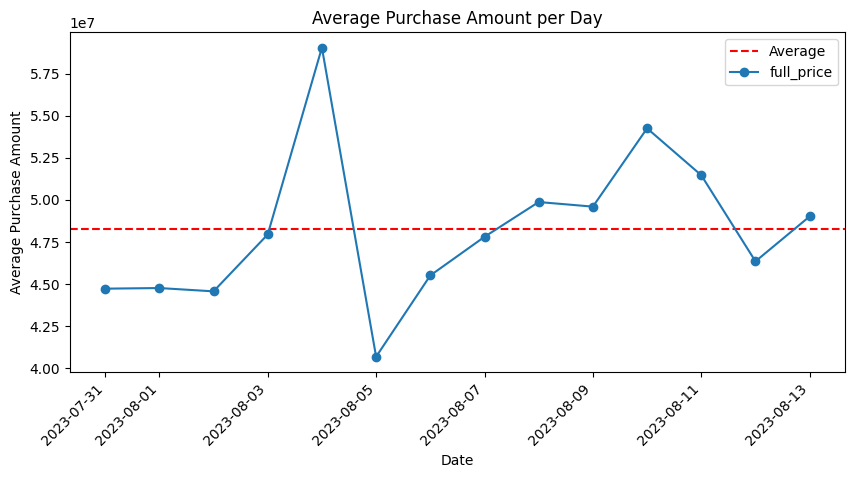

Average Daily Purchase Amount: 48254248.85714286


In [7]:
purchase_per_day_2 = purchase.groupby('event_date')['full_price'].mean()

# Вычисление средней суммы покупок
mean_2 = purchase_per_day_2.mean().compute()

#График средней суммы покупок юзеров по дням
plt.figure(figsize=(10, 6))
plt.axhline(y=mean, color='red', linestyle='--', label='Average')
purchase_per_day.compute().plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount per Day')
plt.legend()
plt.show()

print('Average Daily Purchase Amount:', mean)

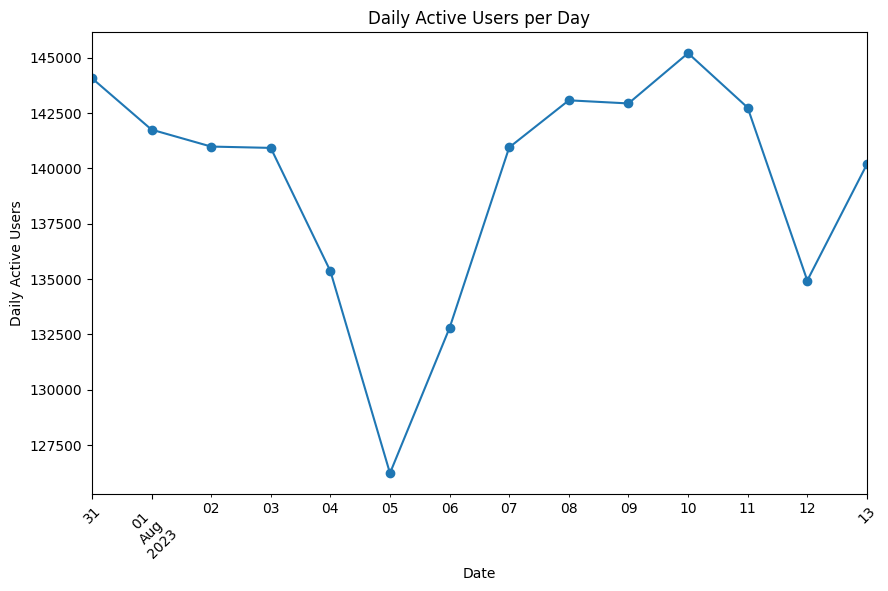

In [14]:
# Выбор уникальных пользователей для каждой даты
dau_per_day = df.groupby('utc_event_date')['user_id'].nunique()

# Подсчет DAU
plt.figure(figsize=(10, 6))
dau_per_day.compute().plot(kind='line', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.title('Daily Active Users per Day')
plt.show()

In [12]:
# покупательский чек на одного клиента
user_number = purchase['user_id'].nunique()
purchase_amount = purchase['full_price'].sum()
result = purchase_amount / user_number
print(result.compute())

5536.782834615983


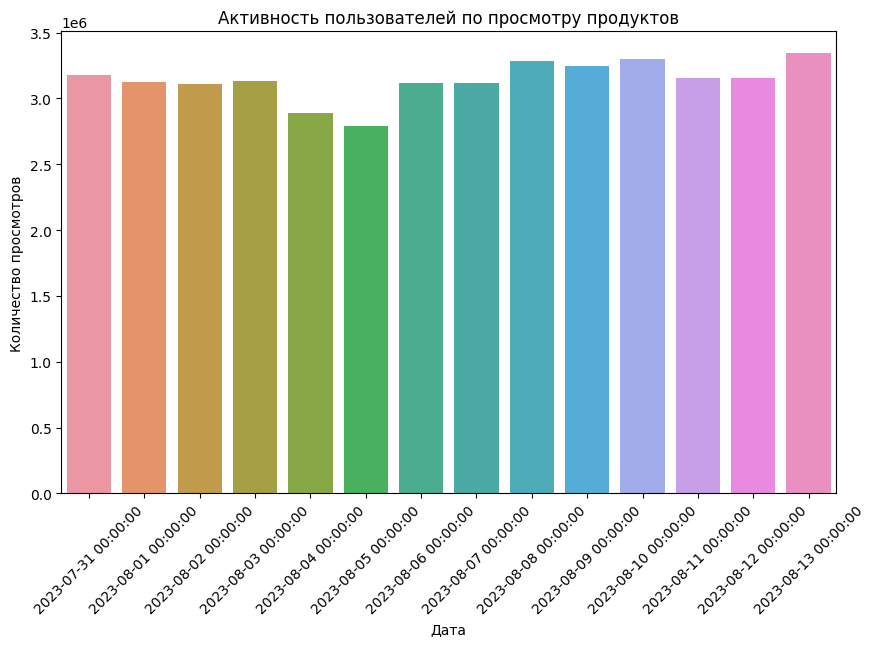

In [15]:
# Какой день был самым активным в просмотре продуктов (view) пользователей
# Выбор строк с событием 'ec.view_item'
view = df[df['event_type'] == 'ec.view_item']

# Группировка по дате события и подсчет количества событий в каждый день
view_per_day = view.groupby('utc_event_date')['event_type'].count()

# Преобразование Dask Series в Pandas Series для визуализации
view_per_day_computed = view_per_day.compute()

# Визуализация данных
plt.figure(figsize=(10, 6))
sns.barplot(x=view_per_day_computed.index, y=view_per_day_computed.values)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество просмотров')
plt.title('Активность пользователей по просмотру продуктов')
plt.show()

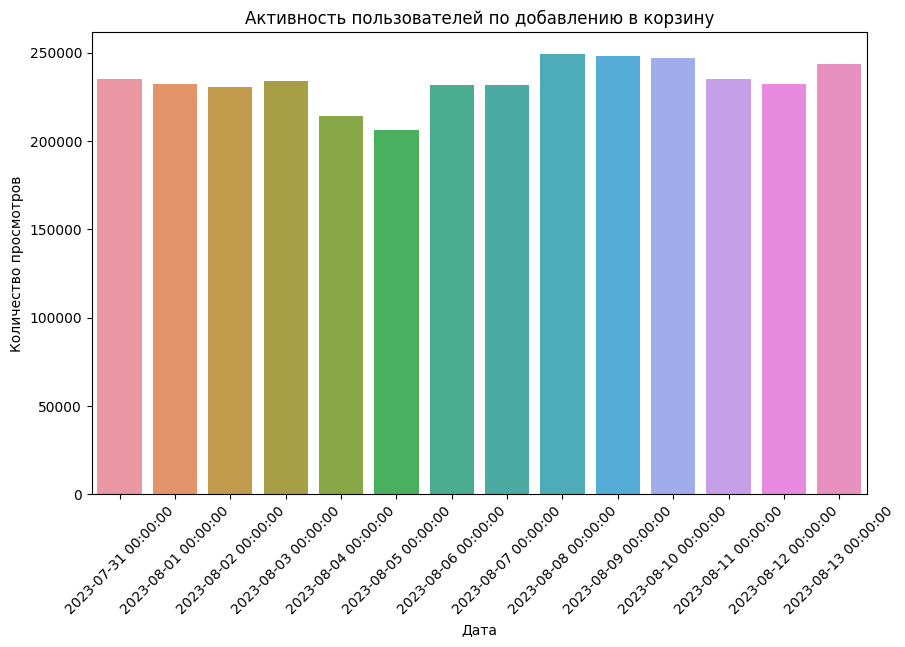

In [16]:
#Какой день был наиболее активным по добавлению продуктов в корзину пользователями?
# Выбор строк с событием 'ec.view_item'
add = df[df['event_type'] == 'ec.add_to_cart']

# Группировка по дате события и подсчет количества событий в каждый день
view_per_day_3 = add.groupby('utc_event_date')['event_type'].count()

# Преобразование Dask Series в Pandas Series для визуализации
view_per_day_computed = view_per_day_3.compute()

# Визуализация данных
plt.figure(figsize=(10, 6))
sns.barplot(x=view_per_day_computed.index, y=view_per_day_computed.values)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество просмотров')
plt.title('Активность пользователей по добавлению в корзину')
plt.show()

In [19]:
#Конверсия корзины
# Выбор строк с событием 'ec.add_to_cart' и 'ec.view_item'
only_cart = df[df['event_type'] == 'ec.add_to_cart']
only_view = df[df['event_type'] == 'ec.view_item']

# Фильтрация строк только для уникальных пользователей
unique_user_ids = only_cart['user_id'].unique().compute()
only_cart = only_cart[only_cart['user_id'].isin(unique_user_ids)]

# Вычисление конверсии корзины
conversion_rate = (only_cart['user_id'].nunique() / df['user_id'].nunique()) * 100

# Вычисление и вывод результата
print(conversion_rate.compute())


40.732167109237224


In [20]:
#Конверсия покупок
only_purchase = df[df['event_type'] == 'ec.purchase']

# Фильтрация строк только для уникальных пользователей
unique_user_ids = only_purchase['user_id'].unique().compute()
only_purchase = only_purchase[only_purchase['user_id'].isin(unique_user_ids)]

# Вычисление конверсии покупок
conversion_rate = (only_purchase['user_id'].nunique() / df['user_id'].nunique()) * 100

# Вычисление и вывод результата
print(f'{conversion_rate.compute()}%')

24.732531976567408%


In [21]:
# Конверсия view-> only cart
# Выбор строк с событием 'ec.view_item'
view = df[df['event_type'] == 'ec.view_item']

# Выбор строк с событием 'ec.add_to_cart'
cart = df[df['event_type'] == 'ec.add_to_cart']

# Фильтрация строк только для уникальных пользователей
unique_user_ids = cart['user_id'].unique().compute()
cart = cart[cart['user_id'].isin(unique_user_ids)]

# Вычисление конверсии view -> only cart
conversion_rate = (cart['user_id'].nunique() / view['user_id'].nunique()) * 100

# Вычисление и вывод результата
print(conversion_rate.compute())

50.388930403775454


In [22]:
# Конверсия view -> only purchase
# Выбор строк с событием 'ec.view_item'
view = df[df['event_type'] == 'ec.view_item']

# Выбор строк с событием 'ec.purchase'
purchase = df[df['event_type'] == 'ec.purchase']

# Фильтрация строк только для уникальных пользователей
unique_user_ids = purchase['user_id'].unique().compute()
purchase = purchase[purchase['user_id'].isin(unique_user_ids)]

# Вычисление конверсии view -> only purchase
conversion_rate = (purchase['user_id'].nunique() / view['user_id'].nunique()) * 100

# Вычисление и вывод результата
print(conversion_rate.compute())

30.596109191395886


In [23]:
#Конверсия cart -> purchase
# Выбор строк с событием 'ec.add_to_cart'
cart = df[df['event_type'] == 'ec.add_to_cart']

# Выбор строк с событием 'ec.purchase'
purchase = df[df['event_type'] == 'ec.purchase']

# Фильтрация строк только для уникальных пользователей
unique_user_ids = purchase['user_id'].unique().compute()
cart = cart[cart['user_id'].isin(unique_user_ids)]

# Вычисление конверсии cart -> purchase
conversion_rate = (purchase['user_id'].nunique() / cart['user_id'].nunique()) * 100

# Вычисление и вывод результата
print(conversion_rate.compute())

100.81302828247776


In [9]:
# Делаем новый датафрейм, ибо тот слищком большой
sampled_df = df.sample(frac=0.001)  

In [10]:
sampled_df.head(5)

,platform,utc_event_time,utc_event_date,user_id,event_type,ecom.price100,ecom.qty,ecom.nm,full_price
171319,iOS,2023-07-31 20:51:49+00:00,2023-07-31,281519103136357882307631788159597424519,ec.view_item,[46700],[1],[142422697075873440121737921783203613482],46700
254707,iOS,2023-07-31 17:44:48+00:00,2023-07-31,22679982971210315682180889860936191798,ec.view_item,[494600],[1],[276553185913300241298617703629558186801],494600
247402,iOS,2023-07-31 20:40:59+00:00,2023-07-31,321729067531912151230958597895508718268,ec.view_item,[19100],[1],[146159429295222657085122514072398547725],19100
320306,Android,2023-07-31 20:12:32+00:00,2023-07-31,46177769976222672168690992447713759669,ec.view_item,[31600],[1],[332955171390405245902244886807454175309],31600
303492,iOS,2023-07-31 20:17:40+00:00,2023-07-31,69148582852591681669608856932674339803,ec.view_item,[55200],[1],[85413080102912840230529373639500347919],55200


In [12]:
global_train, global_test = dcv.train_test_split(sampled_df, test_size = 0.3, random_state=42)

In [13]:
#Делим global_train на first_level_train и first_level_test
first_level_train, first_level_test = dcv.train_test_split(global_train, test_size = 0.3, random_state=42)

In [14]:
# Делим first_level_test на second_level_train и second_level_test
second_level_train, second_level_test = dcv.train_test_split(first_level_test, test_size = 0.3, random_state=42)

In [17]:
first_level_train.shape

(Delayed('int-b3719da4-46d4-4742-9773-54872445dee6'), 9)

In [18]:
import dask.dataframe as dd
import dask.array as da

# Преобразование столбца 'ecom.qty' в список
def parse_qty(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except:
        return x

first_level_train['ecom.qty'] = first_level_train['ecom.qty'].apply(parse_qty)

# Преобразование столбца 'ecom.nm' в список
def parse_nm(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except:
        return x

first_level_train['ecom.nm'] = first_level_train['ecom.nm'].apply(parse_nm)

# Получение уникальных пользователей
users = first_level_train['user_id'].unique().compute()

# Создание отображения пользователей в числовые коды
user_mapping = dict(zip(users, range(len(users))))

# Получение уникальных товаров
items = first_level_train['ecom.nm'].explode().unique().compute()

# Создание отображения товаров в числовые коды
item_mapping = dict(zip(items, range(len(items))))

# Создание разреженной матрицы с использованием Dask
rows = dd.from_array(first_level_train['user_id'].map(user_mapping), columns='user_id')
cols = dd.from_array(first_level_train['ecom.nm'].explode().map(item_mapping), columns='ecom.nm')
data = dd.from_array(first_level_train['ecom.qty'].explode().astype(float), columns='ecom.qty')

interaction_matrix = da.from_delayed(
    da.Sparse.from_dask_array(
        dd.concat([rows, cols, data], axis=1).to_records(index=False),
        shape=(len(user_mapping), len(item_mapping)),
        fill_value=0.0
    ).to_delayed()
).compute()

# interaction_matrix теперь представляет собой разреженную матрицу взаимодействий


In [ ]:
# Подготовка ALS
model = implicit.als.AlternatingLeastSquares(factors=64, regularization=0.05, iterations=20)

In [ ]:
# Тренируем модель
model.fit(interaction_matrix)

In [ ]:
#Функция для ввода user_id и вывода топ 10 рекомендаций
def recommend(user_index, N=10):
    user_vector = model.user_factors[user_index]
    scores = np.dot(model.item_factors, user_vector)
    top_item_indices = np.argsort(scores)[::-1][:N]
    return top_item_indices